# Reto - Fase 2: Sistema dinámico SIR
---

Modelación de sistemas con ecuaciones diferenciales

Equipo 8:


| Alumno | Matrícula |
| --- | --- |
| Juan Pablo Echeagaray González | A00830646 |
| Francisco García Barrada | A01735207 |
| Emmanuel Isaí Godínez Flores | A01612966 |
| Emanuel Park Kim | A00831441 |
| José Miguel Pérez Flores | A00832401 |

Profesores:

- Dr. Abraham Benito Barragán Amigón
- Dr. María Dolores García Martínez
  
16 de noviembre del 2021

### Librerías básicas

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')


### Implementación de funciones

#### Método de RK4

In [25]:
def RK4(dfe, span: list, init: list, h=0.01) -> list:
    """## Método de RK4 para ODEs.

    ### Args:
        - dfe (function): Función que contenga el sistema de ODEs.
        - span (list): Rango de valores en los que se desea resolver el sistema.
        - init (list): Condiciones iniciales del sistema.
        - h (float): Tamaño de paso, debe de ser menor a 0.5 para que converja.

    ### Returns:
        - list: Regresa una lista de valores "t" y "y".
    """

    if np.ndim(init) == 0:
        m = 1
    else:
        m = len(init)

    t0 = span[0]
    tf = span[1]
    N = int((tf - t0) / h)
    t = np.zeros(N + 1)
    y = np.zeros([N + 1, m])
    t[0] = t0
    y[0, :] = init

    for i in range(N):
        k1 = dfe(t[i], y[i, :])
        k2 = dfe(t[i] + 0.5 * h, y[i, :] + 0.5 * h * k1)
        k3 = dfe(t[i] + 0.5 * h, y[i, :] + 0.5 * h * k2)
        k4 = dfe(t[i] + h, y[i, :] + h * k3)

        t[i + 1] = t[i] + h
        y[i + 1, :] = y[i, :] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return t, y


#### Visualización de resultados

In [26]:
def visualize(t: list, y: list, title: str, subtitles: list, tags: list, unit: str) -> None:
    fig, ax = plt.subplots(3, 1, figsize=(10, 10))
    fig.suptitle(title, fontsize=16)

    ax[0].plot(t, y[:, 0], 'r', label=tags[0])
    ax[0].title.set_text(subtitles[0])
    ax[1].plot(t, y[:, 1], 'b', label=tags[1])
    ax[1].title.set_text(subtitles[1])
    ax[2].plot(t, y[:, 2], 'g', label=tags[2])
    ax[2].title.set_text(subtitles[2])

    for pic in ax:
        pic.legend(loc='best')
        pic.set_xlabel(f'Tiempo ({unit})')
        pic.set_ylabel('Cantidad')

    fig.tight_layout()


## Modelo SIR básico

$$
\begin{aligned}
\frac{dS}{dt}&= -\beta \frac{I}{N} S\\
\frac{dI}{dt}&= \beta\frac{I}{N}S-\gamma I\\
\frac{dR}{dt}&= \gamma I
\end{aligned}
$$

## Pregunta 1

Haga cambios en el modelo para tomar en cuenta el hecho de que la población no es constante:

- agregar un término de incremento en $dS$ para tomar en cuenta los individuos nacidos $+bN$
- agregar un término de decremento en $dS$ para tomar en cuenta las personas susceptibles que mueren $-\mu S$
- agregar un término de decremento en $dI$ para tomar en cuenta las personas infectadas que mueren $-\mu I$
- agregar un término de decremento en $dR$ para tomar en cuenta las personas recuperadas que fallecen $−\mu R$

Usar ahora los paámetros:

- $\beta = 0.4 \ {days}^{−1} = (0.4 \times 365) \ {years}^{−1}$
- $\gamma = 0.2 \ {days}^{−1} = (0.2 \times 365) \ {years}^{−1}$
- $\mu = \frac{1}{70} {years}^{−1}$
- $b = \frac{1}{70} {years}^{−1}$

Considerar una duración de 1 año.

### Sistema propuesto

$$
\begin{aligned}
\frac{dS}{dt}&= -\beta \frac{I}{N} S + b N - \mu S \\
\frac{dI}{dt}&= \beta\frac{I}{N}S-\gamma I - \mu I\\
\frac{dR}{dt}&= \gamma I - \mu R
\end{aligned}
$$


### Condiciones iniciales

In [27]:
t0 = 0
tf = 365
beta = 0.4
gamma = 0.2
# ~ Número de personas que nacen en un día (Más o menos)
b = 1 / (70 * 365)
# ~ Número de personas que mueren en un día
mu = 1 / (70 * 365)
init = [999_999, 1, 0]  # [S(0), I(0), R(0)]
N = sum(init)


### Modelo SIR con dinámica vital

In [28]:
def SIR_vital(t, y):
    S = y[0]
    I = y[1]
    R = y[2]
    N = S + I + R
    dS = - beta * I * S / N + b * N - mu * S
    dI = beta * I * S / N - gamma * I - mu * I
    dR = gamma * I - mu * R
    dydt = np.array([dS, dI, dR])
    return dydt


### Ejecución del algoritmo

In [29]:
t_1, y_1 = RK4(SIR_vital, [t0, tf], init)


### Respaldo de datos

In [30]:
df = pd.DataFrame(y_1, index=t_1, columns=['S', 'I', 'R'])
df.to_csv('data\\fase2\\fase2_1.csv')
print(df.head(5))
print(df.tail(5))


                  S         I         R
0.00  999999.000000  1.000000  0.000000
0.01  999998.995996  1.002002  0.002002
0.02  999998.991985  1.004007  0.004008
0.03  999998.987965  1.006017  0.006018
0.04  999998.983937  1.008030  0.008032
                    S             I              R
364.96  212025.376843  3.579024e-10  787974.623157
364.97  212025.685248  3.574902e-10  787974.314752
364.98  212025.993652  3.570785e-10  787974.006348
364.99  212026.302057  3.566673e-10  787973.697943
365.00  212026.610462  3.562566e-10  787973.389538


### Visualización de la situación

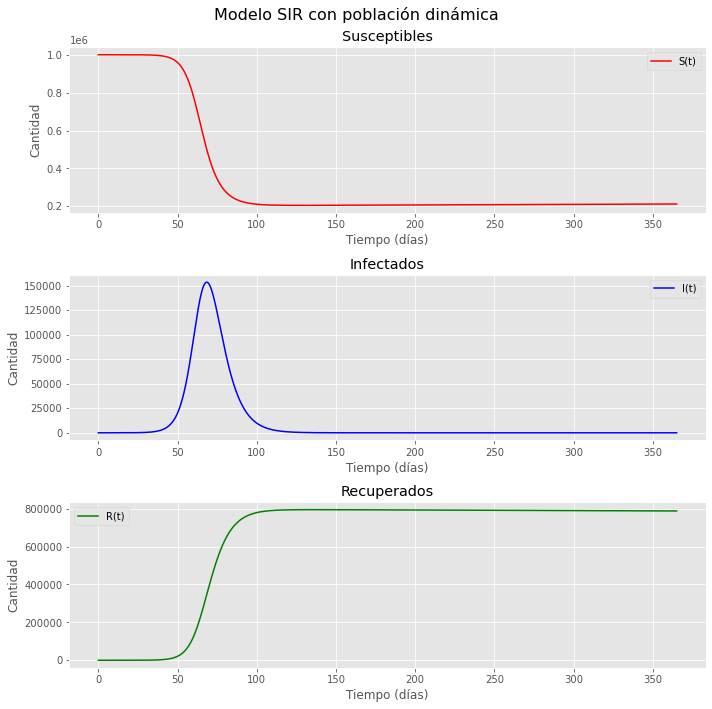

In [31]:
title = 'Modelo SIR con población dinámica'
subtitles = ['Susceptibles', 'Infectados', 'Recuperados']
tags = ['S(t)', 'I(t)', 'R(t)']
unit = 'días'

visualize(t_1, y_1, title, subtitles, tags, unit)


Dadas las modificaciones que hemos hecho, vemos que la pandemia se desarrolla como lo haría normalmente, pero ahora el tamaño de la población ha permanecido constante durante todo el fenómeno, puesto que para este ejercicio hemos escogido una tasa de natalidad igual que la de mortalidad. 

## Pregunta 2

Considerando el modelo SIR básico (Tal vez sea  mejor usar el que considera una población no constante como el básico), haga cambios para tomar en cuenta un programa de vacunación. Suponga que una fracción $v$ de susceptibles se vacuna de manera que queda inmune (y entra ahora directamente en el conjunto de los recuperados). Calcule la dinámica de la epidemia en este caso usando los parámetros $\beta$ = 0.4, $\gamma$ = 0.1 y considere un periodo de 2 años.

Su modelo debe ser capaz de mostrar que si la fracción $v$ es suficiente, no es necesario vacunar a todos los suceptibles para evitar la epidemia. A este efecto se le conoce como inmunidad de rebaño y se refiere a que si un sector grande de la población es inmune, entonces los contagios se mantienen a un nivel en el que la enfermedad es eliminada.

¿Cómo se puede calcular la fracción mínima $v$ de personas que se deben vacunar para poder evitar una epidemia? La inmunidad de rebaño ocurre cuando $R_{eff} < 1$.

### Fracción mínima de personas que se deben vacunar

Podemos decir coloquialmente que le estamos "ganando" a la pandemia cuando el número de infectados va en descenso, en el contexto de esta clase, eso ocurre cuando la tasa de cambio de los infectados es negativa, haciendo esa suposición podemos encontrar lo siguiente:

\begin{gather*}
    \frac{dI}{dt} = \beta\frac{I}{N}S - \gamma I \\
    \frac{dI}{dt} < 0 \\
    \beta\frac{I}{N}S - \gamma I < 0 \\
    \frac{\beta S}{N} - \gamma < 0 \\
    \frac{\beta S}{\gamma N} < 1 \\
    R_0 \frac{S}{N} < 1
\end{gather*}

Al hacer este pequeño desarrollo hemos encontrado los coeficientes que venían en la descripción del problema, pero es de esta desigualdad que ahora podemos estimar la fracción mínima de personas que deben de ser vacunadas para lograr una inmunidad de rebaño. Suponiendo que ya hayamos vacunado a una porción de personas, igual queremos que la expresión anterior se mantenga:

\begin{gather*}
    R_0 \frac{\bar{S_v}}{N} < 1 \\
    \frac{\bar{S_v}}{N} < \frac{1}{R_0} \\
    \frac{\bar{S_v}}{N} < \frac{\gamma}{\beta}
\end{gather*}

La expresión anterior quiere decir que al final del periodo de vacunación, la proporción de personas no vacunadas $\bar{S_v}$ debe de ser menor que el inverso de $R_0$. Ya que tenemos una expresión para la proporción de personas no vacunadas, podemos plantear otra ecuación, con la que podremos deducir la fracción mínima de personas que deben de ser vacunadas:

\begin{gather*}
    \bar{S_v} + S_v = N \\
    S_v = N - \bar{S_v} \\
    \frac{S_v}{N} = 1 - \frac{\bar{S_v}}{N} \\
    \frac{S_v}{N} > 1 - \frac{\gamma}{\beta}
\end{gather*}

La proporción de personas que deberán vacunarse para lograr la inmunidad de rebaño es:

\begin{equation}
    v > 1 - \frac{\gamma}{\beta}
\end{equation}


### Sistema propuesto

$$
\begin{aligned}
\frac{dS}{dt}&= -\beta \frac{I}{N} S + (1 - v) N\\
\frac{dI}{dt}&= \beta\frac{I}{N}S - \gamma I \\
\frac{dR}{dt}&= \gamma I + v N
\end{aligned}
$$

### Condiciones iniciales

In [32]:
t0 = 0
tf = 2
init = [999_999, 1, 0]  # [S(0), I(0), R(0)]
beta = 0.4 * 365
gamma = 0.1 * 365
mu = b
v = 1 - gamma / beta
print(f'% Vacunaciones = {v * 100:.2f} %')


% Vacunaciones = 75.00 %


Dada las tasas de infección y de recuperación, será necesario tener vacunada al $75\%$ de la población para que la pandemia desaparezca. Esta aseveración puede comprobarse al reducir el valor que proponemos de v; en caso de hacerlo, se verá como después de un tiempo la curva de infectados se elevará de nuevo, puede que el lapso de tiempo sea más grande, pero una nueva ola de contagios llegará.

### Modelo SIR con vacunaciones

In [33]:
def SIR_vaccine(t, y):
    S = y[0]
    I = y[1]
    R = y[2]
    N = S + I + R
    delta = beta * I * S / N
    dS = - delta + (1 - v) * N
    dI = delta - I * gamma
    dR = gamma * I + v * N
    dydt = np.array([dS, dI, dR])
    return dydt


### Ejecución del algoritmo

In [34]:
t_vac, y_vac = RK4(SIR_vaccine, [t0, tf], init, 0.001)


### Respaldo de resultados

In [35]:
dfvac = pd.DataFrame(y_vac, index=t_vac, columns=['S', 'I', 'R'])
dfvac.to_csv('data\\fase2\\fase2_2.csv')
print(dfvac.head(5))
print(dfvac.tail(5))


                  S         I            R
0.000  9.999990e+05  1.000000     0.000000
0.001  1.000249e+06  1.115659   750.413698
0.002  1.000499e+06  1.244558  1501.582605
0.003  1.000750e+06  1.388198  2253.507982
0.004  1.001000e+06  1.548248  3006.191150
                  S             I             R
1.996  1.568311e+06  2.417172e-07  5.791248e+06
1.997  1.570152e+06  2.404191e-07  5.796770e+06
1.998  1.571995e+06  2.391292e-07  5.802298e+06
1.999  1.573839e+06  2.378475e-07  5.807831e+06
2.000  1.575686e+06  2.365740e-07  5.813370e+06


### Visualización de la situación

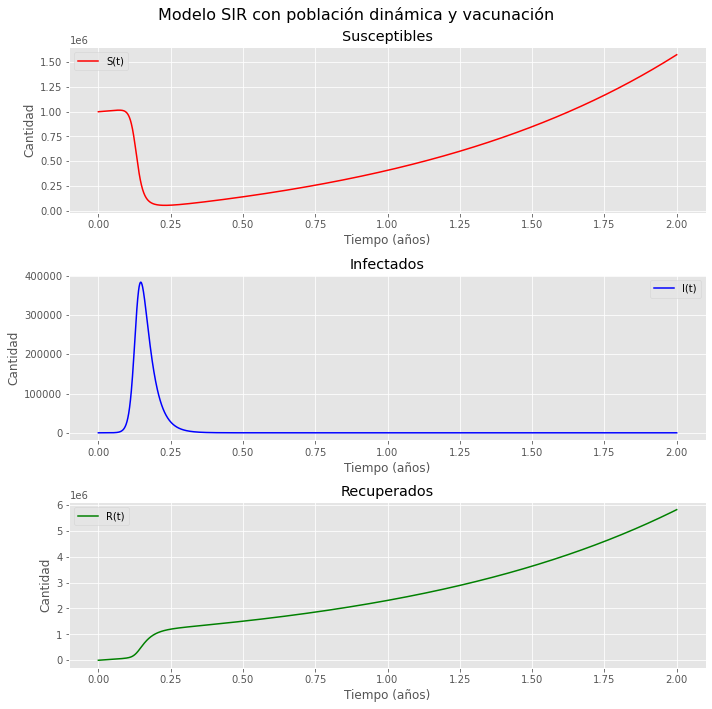

In [36]:
title = 'Modelo SIR con población dinámica y vacunación'
subtitles = ['Susceptibles', 'Infectados', 'Recuperados']
tags = ['S(t)', 'I(t)', 'R(t)']
unit = 'años'

visualize(t_vac, y_vac, title, subtitles, tags, unit)


Como en este modelo no hemos incluido las dinámicas vitales, tendremos una población que crecerá ininitamente, (por la suma de los términos $vN$ y $(1 - v)N$ a las ecuaciones diferenciales). Sin embargo, aunque la población crezca indefinidamente, podemos ver que la pandemia ha sido erradicada, el número de infectados es virtualmente 0.

## Pregunta 3

Haga cambios en el modelo para tomar en cuenta el hecho de que la población no es constante:

- agregar un término de incremento en $dS$ para tomar en cuenta los individuos nacidos $+bN$
- agregar un término de decremento en $dS$ para tomar en cuenta las personas susceptibles que mueren $-\mu S$
- agregar un término de decremento en $dI$ para tomar en cuenta las personas infectadas que mueren $-\mu I$
- agregar un término de decremento en $dR$ para tomar en cuenta las personas recuperadas que fallecen $−\mu R$

Usar ahora los paámetros:

- $\beta = 0.4 \ {days}^{−1} = (0.4 \times 365) \ {years}^{−1}$
- $\gamma = 0.2 \ {days}^{−1} = (0.2 \times 365) \ {years}^{−1}$
- $\mu = \frac{1}{70} \ {years}^{−1}$
- $b = \frac{1}{70} \ {years}^{−1}$

Considerar una duración de 400 años.

### Sistema propuesto


$$
\begin{aligned}
\frac{dS}{dt}&= -\beta \frac{I}{N} S + b N - \mu S \\
\frac{dI}{dt}&= \beta\frac{I}{N}S-\gamma I - \mu I\\
\frac{dR}{dt}&= \gamma I - \mu R
\end{aligned}
$$

### Condiciones iniciales

In [37]:
t0 = 0
tf = 400
beta = 0.4 * 365
gamma = 0.2 * 365
b = 1 / 70
mu = 1 / 70
init = [999_999, 1, 0]  # [S(0), I(0), R(0)]
N = sum(init)


### Modelo SIR con dinámica vital

In [38]:
def SIR_vital(t, y):
    S = y[0]
    I = y[1]
    R = y[2]
    N = S + I + R
    dS = - beta * I * S / N + b * N - mu * S
    dI = beta * I * S / N - gamma * I - mu * I
    dR = gamma * I - mu * R
    dydt = np.array([dS, dI, dR])
    return dydt


### Ejecución del algoritmo

In [39]:
t_3, y_3 = RK4(SIR_vital, [t0, tf], init)


### Respaldo de resultados

In [40]:
df3 = pd.DataFrame(y_3, index=t_3, columns=['S', 'I', 'R'])
df3.to_csv('data\\fase2\\fase2_3.csv')
print(df3.head(5))
print(df3.tail(5))


                  S          I          R
0.00  999999.000000   1.000000   0.000000
0.01  999996.854216   2.072818   1.072966
0.02  999992.406572   4.296557   3.296871
0.03  999983.187716   8.905857   7.906427
0.04  999964.079578  18.459602  17.460820
                    S          I              R
399.96  503890.722681  80.536487  496028.740832
399.97  503902.180295  80.984383  496016.835322
399.98  503913.304034  81.436113  496005.259853
399.99  503924.091153  81.891672  495994.017175
400.00  503934.538910  82.351057  495983.110033


### Visualización de la situación

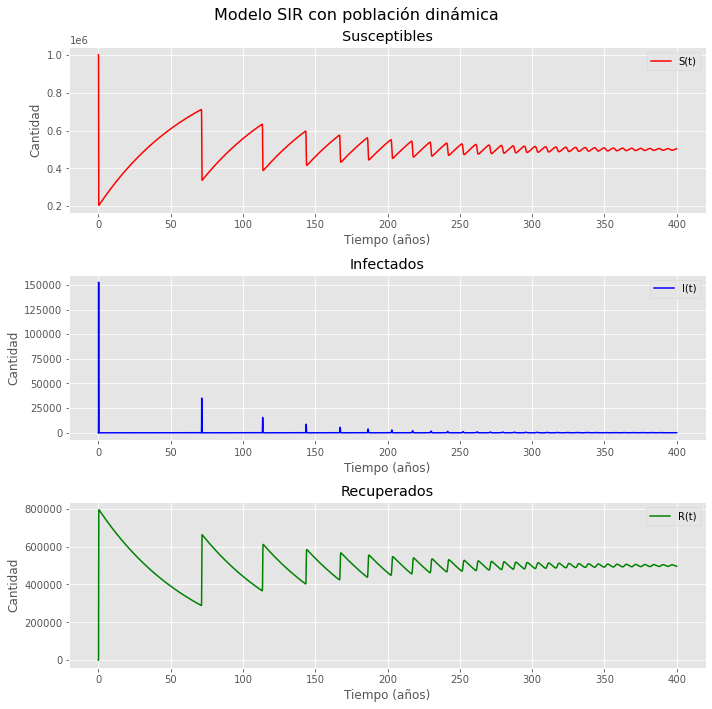

In [41]:
title = 'Modelo SIR con población dinámica'
subtitles = ['Susceptibles', 'Infectados', 'Recuperados']
tags = ['S(t)', 'I(t)', 'R(t)']
unit = 'años'

visualize(t_3, y_3, title, subtitles, tags, unit)


De acuerdo al modelo que proponemos y a la solución numérica generada, la pandemia acabará por ser erradicada con el paso del tiempo, habrá un comportamiento periódico en las 3 posibles categorías, pero al paso del tiempo las cantidades se asentarán en los siguientes valores:

- $S \approx 500108$
- $I \approx 97$
- $R \approx 499793$

Estos valores los obtuvimos al incrementar aún más el tiempo de observación del fenómeno.

## Pregunta 4

Considerando el modelo SIR básico, haga cambios para tomar en cuenta un programa de vacunación. Suponga que una fracción $v$ de susceptibles se vacuna de manera que queda inmune (y entra ahora directamente en el conjunto de los recuperados), mientras que la fracción $(1 − v)$ sigue siendo susceptible.

Calcule la dinámica de la epidemia en este caso, estudiando cómo cambia la dinámica variando la fracción $v$. Utilice $\beta = 0.6$, $\gamma = 0.1$ y considere un periodo de 2 años.

Su modelo debe ser capaz de mostrar que si la fracción $v$ es suficiente, no es necesario vacunar a todos los suceptibles para evitar la epidemia. A este efecto se le conoce como inmunidad de rebaño y se refiere a que si un sector grande de la población es inmune, entonces los contagios se mantienen a un nivel en el que la enfermedad es eliminada.

¿Cómo se puede calcular la fracción mínima $v$ de personas que se deben vacunar para poder evitar una epidemia? La inmunidad de rebaño ocurre cuando $R_{eff} < 1$.

### Fracción mínima de personas que deben de ser vacunadas

Para ver con más detalles como se llega a la siguiente expresión, ir a la pregunta 2.

<!-- Tengo que ver como linkear esta celda con el header de la pregunta 2 -->

\begin{equation*}
    v > 1 - \frac{\gamma}{\beta}
\end{equation*}

### Sistema propuesto

$$
\begin{aligned}
\frac{dS}{dt}&= -\beta \frac{I}{N} S + (1 - v) N\\
\frac{dI}{dt}&= \beta\frac{I}{N}S - \gamma I \\
\frac{dR}{dt}&= \gamma I + v N
\end{aligned}
$$

### Condiciones iniciales

In [42]:
t0 = 0
tf = 2
init = [999_999, 1, 0]  # [S(0), I(0), R(0)]
beta = 0.6 * 365
gamma = 0.1 * 365
v = 1 - gamma / beta
print(f'% Vacunaciones = {v * 100:.2f} %')


% Vacunaciones = 83.33 %


El porcentaje de vacunación se ha incrementado a un $83.33\%$, ya que la relación entre la tasa de infección y de recuperación se ha incrementado, esta enfermedad tiene un $R_0 = 6$, el de la otra enfermedad era de $2$.

### Modelo SIR con vacunaciones

In [43]:
def SIR_vaccine(t, y):
    S = y[0]
    I = y[1]
    R = y[2]
    N = S + I + R
    delta = beta * I * S / N
    dS = - delta + (1 - v) * N
    dI = delta - I * gamma
    dR = gamma * I + v * N
    dydt = np.array([dS, dI, dR])
    return dydt


### Ejecución del algoritmo

In [44]:
t_vac2, y_vac2 = RK4(SIR_vaccine, [t0, tf], init, 0.001)


### Respaldo de datos

In [45]:
dfvac2 = pd.DataFrame(y_vac2, index=t_vac2, columns=['S', 'I', 'R'])
dfvac2.to_csv('data\\fase2\\fase2_4.csv')
print(dfvac2.head(5))
print(dfvac2.tail(5))


                  S         I            R
0.000  9.999990e+05  1.000000     0.000000
0.001  1.000166e+06  1.200103   833.790180
0.002  1.000332e+06  1.439984  1668.422535
0.003  1.000499e+06  1.727498  2503.899491
0.004  1.000666e+06  2.072042  3340.223788
                  S             I             R
1.996  1.037756e+06  8.925067e-09  6.321803e+06
1.997  1.038984e+06  8.875081e-09  6.327939e+06
1.998  1.040212e+06  8.825424e-09  6.334081e+06
1.999  1.041442e+06  8.776093e-09  6.340229e+06
2.000  1.042673e+06  8.727088e-09  6.346384e+06


### Visualización de la situación

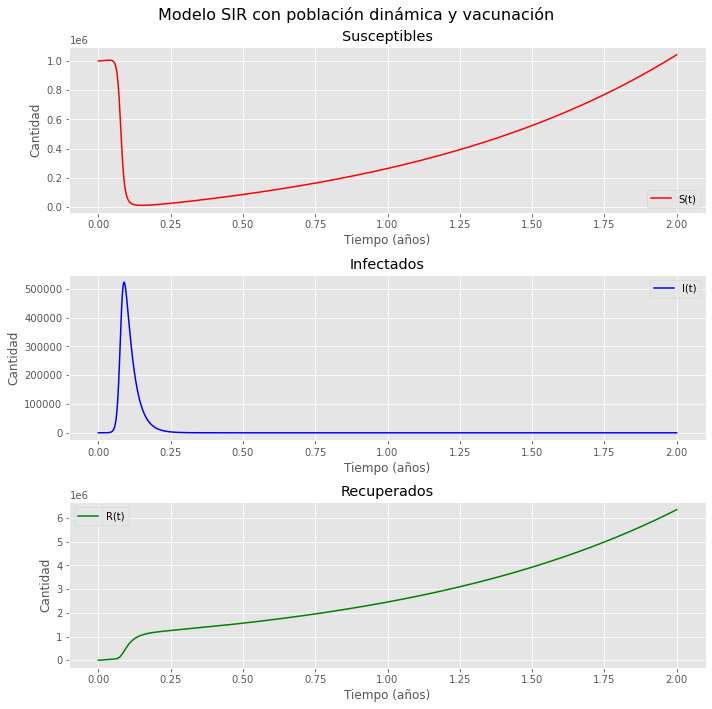

In [46]:
title = 'Modelo SIR con población dinámica y vacunación'
subtitles = ['Susceptibles', 'Infectados', 'Recuperados']
tags = ['S(t)', 'I(t)', 'R(t)']
unit = 'años'

visualize(t_vac2, y_vac2, title, subtitles, tags, unit)


Comprobamos de nuevo que el número de infectados se reducirá a $0$ conforme pasa el tiempo, sin embargo, también vemos que el máximo de infectados sigue teniendo un valor exorbitante, si bien la vacuna logrará que el número de infectados sea $0$ al final, no podrá hacer mucho por todas esas personas que se infectarán en un periodo muy corto de tiempo.